## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

In [3]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt

data = pd.DataFrame(cars)
plt.scatter(data['Price'], data['Mileage'])
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price vs. Mileage')
plt.show()

#[payalr] Looking at the plot its obvious that cars with more mileage are worth less

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [5]:
# Linear regression model:
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

# use mileage column with index 0 for input
X = cars.iloc[:, 1].values
X = np.reshape(X,(804,1))
#use price column with index 1 as output
y = cars.iloc[:, 0].values  

#use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#train
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

# Show summary statistics for the model:
y_pred = regressor.predict(X_test)  
display(y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  



array([20128.83467306, 20774.63777181, 21319.34751891, 20104.52108216,
       20092.79084093, 25221.89213612, 23512.26279676, 24045.45557975,
       20698.07128818, 23738.33653675, 21772.34810733, 24040.33692903,
       20605.50902105, 18532.2422037 , 20919.66620878, 22425.40262793,
       18359.48774201, 25100.75073583, 23432.0706022 , 20106.65385329,
       19930.48695779, 20406.30819733, 19856.05324529, 21854.88635014,
       20817.07991734, 20617.45253939, 23656.86467951, 20961.46852297,
       20354.90841305, 19423.95381396, 16366.1998421 , 18817.60698115,
       19628.69984262, 20360.45361799, 23953.74642107, 19635.09815602,
       20966.58717369, 23519.72749573, 19918.75671657, 20345.95077429,
       21940.62374964, 21659.95106868, 24257.66630738, 23717.86193388,
       24981.74210667, 18870.71298234, 20651.5768775 , 18817.18042692,
       21491.24887214, 20447.8972344 , 24298.402236  , 20461.12041542,
       22261.39252788, 18986.73573191, 20880.42321996, 21336.62296508,
      

Mean Absolute Error: 7910.7552539401695
Mean Squared Error: 98834823.21050867
Root Mean Squared Error: 9941.570459968016


,Actual,Predicted
0,30166.85,20128.834673
1,28204.60,20774.637772
2,21460.01,21319.347519
3,35338.65,20104.521082
4,23329.21,20092.790841
5,15635.80,25221.892136
6,32422.76,23512.262797
7,49248.16,24045.455580
8,11169.92,20698.071288
9,41378.05,23738.336537


<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [6]:
# Command:
X=X+1
#use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#train
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

# Show summary statistics for the model:
y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

# One sentence summary:
# [payalr]No difference observed after adding one more mile

Mean Absolute Error: 7910.7552539401695
Mean Squared Error: 98834823.21050867
Root Mean Squared Error: 9941.570459968016


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [7]:
# Single command
output = regressor.predict(0)
print(output)

#[payal] value of car with 0 miles is [25471.42635856]

[25471.42635856]


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

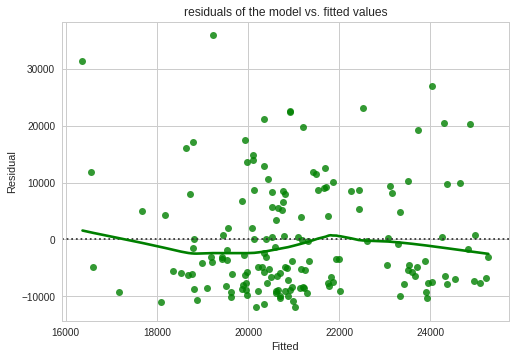

In [8]:
# Plot residuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# fillted = predicted
x = y_pred
# residual = actual - predicted
y = y_test - y_pred

sns.residplot(x, y, lowess=True, color="g")
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('residuals of the model vs. fitted values')
plt.show()

# Explain whether there are any problems (1-2 sentence)
# [payal] Residual points are scattered , it shows that prediction was bad in many cases
# There are outliers and its not uniformly distributed around y axis

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

Mean Absolute Error: 6321.0390581310785
Mean Squared Error: 57763367.91406174
Root Mean Squared Error: 7600.221570063713


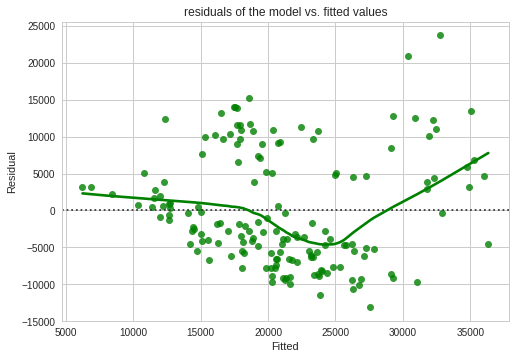

In [9]:
# Commands:
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import matplotlib.pyplot as plt

# use  columns Mileage, Cylinder, Doors, Cruise, Sound, Leather with index 1 to 6 as input
X = cars.iloc[:, [1,2,3,4,5,6]].values
X = np.reshape(X,(804,6))
#use price column with index 0 as output
y = cars.iloc[:, 0].values  

#use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#train
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

# Show summary statistics for the model:
y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# Explanation:
# [payal] yes , this is more accurate, all the statistics for this model are better , errors are smaller than with model using only mileage
# [payal] Looking at the residual plot, its more obvious that predictions are more close to actual that model with mileage only

import seaborn as sns
sns.set(style="whitegrid")

# fillted = predicted
x = y_pred
# residual = actual - predicted
y = y_test - y_pred

sns.residplot(x, y, lowess=True, color="g")
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('residuals of the model vs. fitted values')
plt.show()

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [11]:
# Command(s):
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = cars.iloc[:, [1,2,3,4,5,6]]
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

# Comment on the result
#[payalr] Collinearity is measured by Variance Inflation Factor (VIF) , in this case VIF is not high enough for any column to say that they impact model quality

,VIF Factor,features
0,5.9,Mileage
1,13.6,Cylinder
2,10.7,Doors
3,4.6,Cruise
4,3.0,Sound
5,3.7,Leather


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [12]:
#chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors
import numpy as np

X=[30000,4,2,1,1,1]
X = np.reshape(X,(1,6))
output = regressor.predict(X) 
print(output) 

# expected price for chevy is [19817.08361671]

[19817.08361671]


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [34]:
# Commands
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import matplotlib.pyplot as plt

# use  columns with index 1 to 17 as input
X = cars.iloc[:, 1:18].values
X = np.reshape(X,(804,17))
#use price column with index 0 as output
y = cars.iloc[:, 0].values  

#use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#train
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

X=[30000,4,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0]
X = np.reshape(X,(1,17))
output = regressor.predict(X) 
print(output) # expected price fpr chevy is [17494.71269132]

# Show summary statistics for the model:
y_pred = regressor.predict(X_test)  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# Comments on problems
# [payal] the error metrics show smaller error values and the price predicted using all features is smaller than the price predicted using only 6 features  

[17494.71269132]
Mean Absolute Error: 2029.5603482485112
Mean Squared Error: 7227257.325712176
Root Mean Squared Error: 2688.3558778019283


In [ ]:
#what was your incoming experience with this model, if any?
[payal ] Learnt the concept of residual vs fitted plots and how to detect collinearity
#what steps you took, what obstacles you encountered.
[payal] most of it was related to not using np.reshape()
#how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
[payal] Real world data is not ready to use and may not be linear. It takes a lot of time and effort to prepare the data.
The problems in this exercise are very clear: provided a set of features , predict the price. From my experience working in software security I have learnt that its hard to define a well scoped ML problem. 
    It requires lots of domain knowledge to define the problem statement and evaluate the solution.
